# Mushroom Classification

# Logistics regression application
Safe to eat or deadly poison?

This dataset includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family Mushroom drawn from The Audubon Society Field Guide to North American Mushrooms (1981). Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended. This latter class was combined with the poisonous one. The Guide clearly states that there is no simple rule for determining the edibility of a mushroom; no rule like "leaflets three, let it be'' for Poisonous Oak and Ivy.

# Steps
1) Importing libraries

2) Read Data

3) Data Preprocessing

4) Feature Engineering

5) Model Training


## 1)  Importing libraries


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')

## 2) Read Data

In [3]:
data=pd.read_csv("mushrooms.csv")
data

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


## 3) Data Preprocessing

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [5]:
data.describe(include="all")

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [6]:
data.nunique()

class                        2
cap-shape                    6
cap-surface                  4
cap-color                   10
bruises                      2
odor                         9
gill-attachment              2
gill-spacing                 2
gill-size                    2
gill-color                  12
stalk-shape                  2
stalk-root                   5
stalk-surface-above-ring     4
stalk-surface-below-ring     4
stalk-color-above-ring       9
stalk-color-below-ring       9
veil-type                    1
veil-color                   4
ring-number                  3
ring-type                    5
spore-print-color            9
population                   6
habitat                      7
dtype: int64

In [7]:
for col in data:
    print(col)
    print(data[col].value_counts())
    print('\n')

class
e    4208
p    3916
Name: class, dtype: int64


cap-shape
x    3656
f    3152
k     828
b     452
s      32
c       4
Name: cap-shape, dtype: int64


cap-surface
y    3244
s    2556
f    2320
g       4
Name: cap-surface, dtype: int64


cap-color
n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
u      16
r      16
Name: cap-color, dtype: int64


bruises
f    4748
t    3376
Name: bruises, dtype: int64


odor
n    3528
f    2160
y     576
s     576
a     400
l     400
p     256
c     192
m      36
Name: odor, dtype: int64


gill-attachment
f    7914
a     210
Name: gill-attachment, dtype: int64


gill-spacing
c    6812
w    1312
Name: gill-spacing, dtype: int64


gill-size
b    5612
n    2512
Name: gill-size, dtype: int64


gill-color
b    1728
p    1492
w    1202
n    1048
g     752
h     732
u     492
k     408
e      96
y      86
o      64
r      24
Name: gill-color, dtype: int64


stalk-shape
t    4608
e    3516
Name: stalk-shape, dtype: int64


st

In [8]:
data.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [9]:
df=data.copy()
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [10]:
# Target and labels
y =df['class'].copy()

X =df.drop('class',axis=1).copy()


In [11]:
y.sample(5)

1623    e
1315    e
2413    e
7955    e
3358    p
Name: class, dtype: object

In [12]:
X.sample(5)

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
2714,x,y,e,t,n,f,c,b,p,t,...,s,w,g,p,w,o,p,n,v,d
6576,f,s,n,f,f,f,c,n,b,t,...,s,w,p,p,w,o,e,w,v,p
20,b,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,s,m
122,f,y,n,t,p,f,c,n,p,e,...,s,w,w,p,w,o,p,k,v,g
1472,f,s,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,v,u


## 4) Feature Engineering

- __What we are doing :__  Ordinal Encoder
- __Why we are doing__
    -  Used for Feature columns
- __Alternatives :__ OneHotEncoding,Dummivariables



In [24]:
# Encoding label
encoder =OrdinalEncoder()
X_encode=encoder.fit_transform(df)
df=pd.DataFrame(X_encode, columns=df.columns)

In [25]:
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1.0,5.0,2.0,4.0,1.0,6.0,1.0,0.0,1.0,4.0,...,2.0,7.0,7.0,0.0,2.0,1.0,4.0,2.0,3.0,5.0
1,0.0,5.0,2.0,9.0,1.0,0.0,1.0,0.0,0.0,4.0,...,2.0,7.0,7.0,0.0,2.0,1.0,4.0,3.0,2.0,1.0
2,0.0,0.0,2.0,8.0,1.0,3.0,1.0,0.0,0.0,5.0,...,2.0,7.0,7.0,0.0,2.0,1.0,4.0,3.0,2.0,3.0
3,1.0,5.0,3.0,8.0,1.0,6.0,1.0,0.0,1.0,5.0,...,2.0,7.0,7.0,0.0,2.0,1.0,4.0,2.0,3.0,5.0
4,0.0,5.0,2.0,3.0,0.0,5.0,1.0,1.0,0.0,4.0,...,2.0,7.0,7.0,0.0,2.0,1.0,0.0,3.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0.0,3.0,2.0,4.0,0.0,5.0,0.0,0.0,0.0,11.0,...,2.0,5.0,5.0,0.0,1.0,1.0,4.0,0.0,1.0,2.0
8120,0.0,5.0,2.0,4.0,0.0,5.0,0.0,0.0,0.0,11.0,...,2.0,5.0,5.0,0.0,0.0,1.0,4.0,0.0,4.0,2.0
8121,0.0,2.0,2.0,4.0,0.0,5.0,0.0,0.0,0.0,5.0,...,2.0,5.0,5.0,0.0,1.0,1.0,4.0,0.0,1.0,2.0
8122,1.0,3.0,3.0,4.0,0.0,8.0,1.0,0.0,1.0,0.0,...,1.0,7.0,7.0,0.0,2.0,1.0,0.0,7.0,4.0,2.0


<AxesSubplot: >

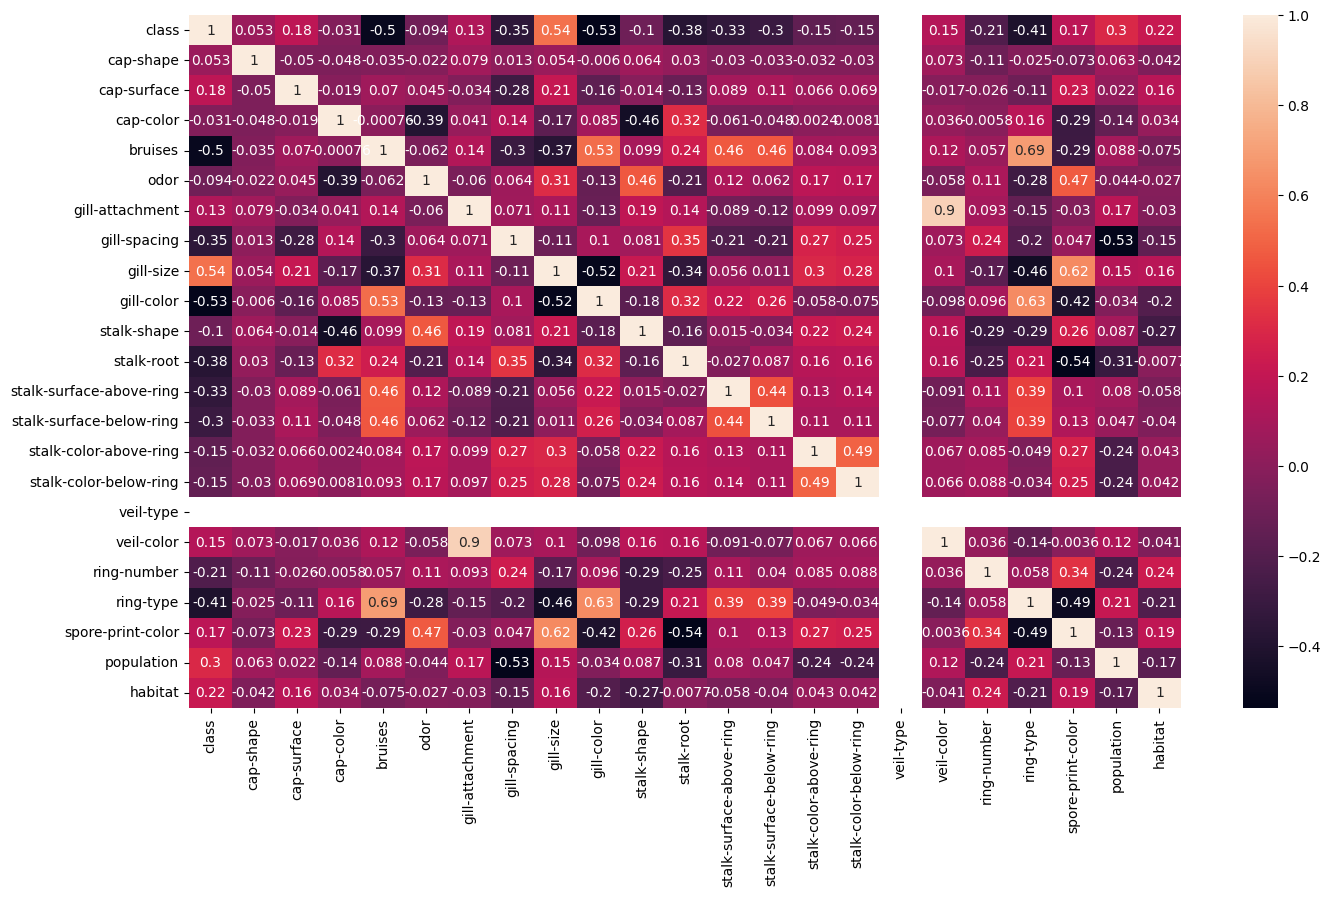

In [26]:
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(),annot=True)

In [ ]:
X

In [27]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

                       Specs        Score
8                 gill-color  5957.764469
18                 ring-type  1950.610146
7                  gill-size  1636.606833
3                    bruises  1194.277352
10                stalk-root  1186.029221
6               gill-spacing   826.795274
21                   habitat   751.309489
19         spore-print-color   379.132729
20                population   311.766736
11  stalk-surface-above-ring   222.982400


In [15]:
y.value_counts()

e    4208
p    3916
Name: class, dtype: int64

In [16]:
y=y.replace({'e':1,'p':0})    # 1 means edible  , 0 means poison

In [17]:
X_train,X_test,y_train,y_test= train_test_split(X,y, train_size=0.7, shuffle=True , random_state=123)

In [18]:
X_test.to_csv("test.csv",index=False)

## 5) Model Training

In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
lor=LogisticRegression()
lor.fit(X_train,y_train)
y_pred=pd.DataFrame(lor.predict(X_test))

              precision    recall  f1-score   support

           0       0.95      0.94      0.94      1167
           1       0.95      0.95      0.95      1271

    accuracy                           0.95      2438
   macro avg       0.95      0.95      0.95      2438
weighted avg       0.95      0.95      0.95      2438



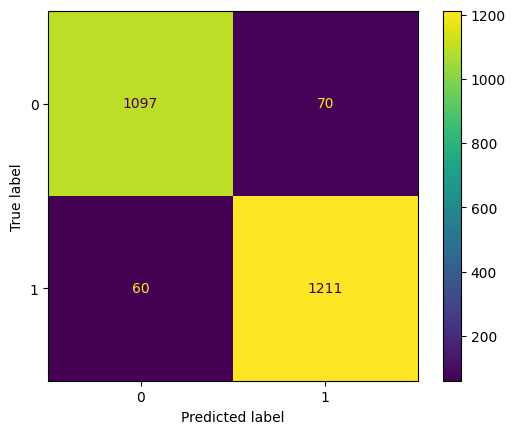

In [21]:
from sklearn.metrics import classification_report,plot_confusion_matrix
plot_confusion_matrix(lor,X_test,y_test)
print(classification_report(y_test,y_pred))

In [22]:
pred=y_pred.replace({1:'Edible',0:"Poison"}) 
pred

,0
0,Edible
1,Edible
2,Edible
3,Poison
4,Edible
...,...
2433,Edible
2434,Poison
2435,Edible
2436,Poison


In [23]:
import joblib as jb

In [24]:
jb.dump(lor,'mushroom.pkl')

['mushroom.pkl']

# Other real life applications of Classification model 
- Email spam detection (spam or not).
- Churn prediction (churn or not).
- Conversion prediction (buy or not).
- Heart Disease Prediction (healthy or bad)
- Cancer prediction (cell affection,stages of cancer)
- Human Face classification (emotion detection,drowsyness detection)
- Plant species classification
- Fraud detection.


# Other Classification models

- Naive Bayes.
- K-Nearest Neighbors.
- Decision Tree.
- Support Vector Machines.
- Random Forest Classifier
- Adaboost Classifier
- Gradient Boost classifier